In [156]:
# Samarth Borade
# BTI SEM 10 
# C009
# EXP 1
# Aim: Implementing Multilayer Perceptron 

<ins><b>Neural Network & Deep Learning </b></ins>





<ins><b>Lab-2:</b></ins> Multilayer Perceptron and Hyperparameter Tuning

- Experiment the performance of the Multilayer Perceptron on the dataset used for Perceptron Implementation.
- Moreover, tune a Multilayer Perceptron on the Adult Dataset.

# Importing the required modules

In [157]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Modules used for Machine Learning models.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Suppressing the warnings.
import warnings
warnings.filterwarnings('ignore')

# Comparision of the Perceptron and MLP on Credit Card Approval Dataset

## Reading the dataset

In [158]:
df = pd.read_csv("crx.csv", header=None)

## Glimpse into the dataset

In [159]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
1,b,30.83,0,u,g,w,v,1.25,t,t,1,f,g,202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
3,a,24.5,0.5,u,g,q,h,1.5,t,f,0,f,g,280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100,3,+


In [160]:
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)

In [161]:
df.head()

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.5,u,g,q,h,1.5,t,f,0,f,g,280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      690 non-null    object
 1   a2      690 non-null    object
 2   s3      690 non-null    object
 3   a4      690 non-null    object
 4   a5      690 non-null    object
 5   a6      690 non-null    object
 6   a7      690 non-null    object
 7   a8      690 non-null    object
 8   a9      690 non-null    object
 9   a10     690 non-null    object
 10  a11     690 non-null    object
 11  a12     690 non-null    object
 12  a13     690 non-null    object
 13  a14     690 non-null    object
 14  a15     690 non-null    object
 15  a16     690 non-null    object
dtypes: object(16)
memory usage: 86.4+ KB


## Data Type Distribution

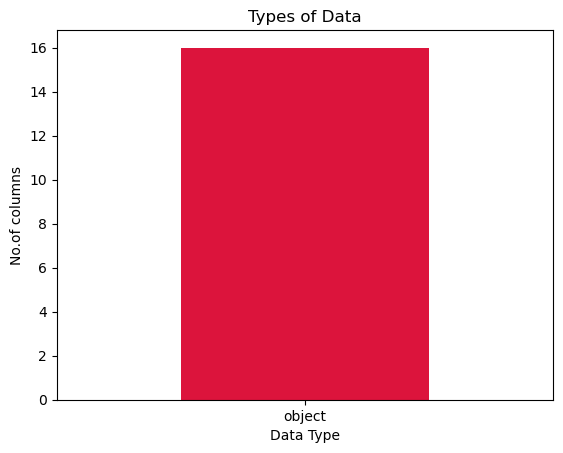

In [163]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of columns are categorical while the others are numerical.

## Seggragation of Columns

In [164]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

In [165]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

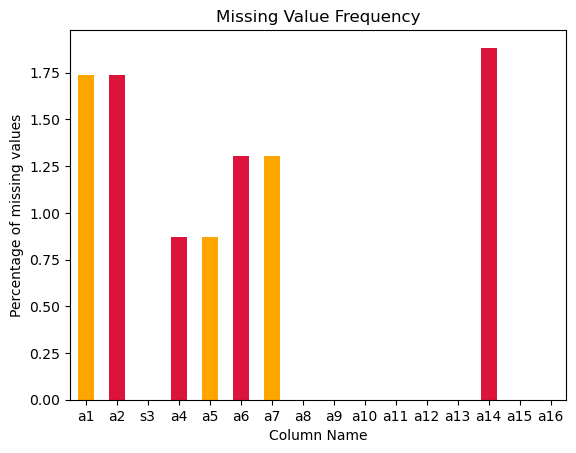

In [166]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

Only 2% of the rows are null and hence directly dropping them is feasible compared to imputation.

## Target Variable Analysis

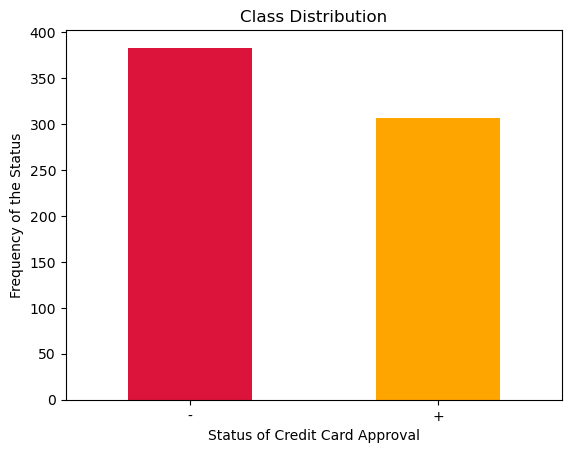

In [167]:
df['a16'].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

The dataset is biased to class "-" since it has higher instances of that class compared to others.

## Pre-processing

### Handling Missing Values

In [168]:
df = df.replace({"?":None})

In [169]:
df = df.dropna()

### Encoding the categorical variables

In [170]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [171]:
df = df.reset_index()

## Train-Test Split

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df['a16'],
    test_size = 0.30,
    train_size=0.70,
    random_state = 0
)
X_train.pop('a16')
X_test.pop('a16')

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
178    1.0
603    0.0
312    0.0
172    1.0
97     0.0
Name: a16, Length: 196, dtype: float64

## Perceptron

### Training and Fitting the model

In [173]:
clf = Perceptron(random_state=0)

In [174]:
clf.fit(X_train,y_train)

Perceptron()

### Validating the model

#### Predictions from the model on the train and test dataset

In [175]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [176]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.9234135667396062

#### Accuracy on the test dataset

In [177]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.9387755102040817

## Multilayer Perceptron

In [178]:
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [179]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [180]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

1.0

#### Accuracy on the test dataset

In [181]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

1.0

## Comparative Inferences

- The Perceptron model gives an accuracy of 67% and 75% on the test and train dataset respectively.
- The MLP model gives an accuracy of 78% and 79% on the test and train dataset respectively.
- Addition of hidden layers gives better results indicating the dataset is not linearly separable.
- The MLP is able to learn a non-linear decision boundary compared to Perceptron which is a linear classifier.